In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline
import sys
sys.path.append('../')
from package_global_functions import *
from filesHandling_quenched import *
from percolationAnalysis import getMeanClusterSize_ir

In [21]:
arena_r, exclusion_r, Ns = 20.0, 1.5, [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
Ns = [35, ]
push = False

[6.1 6.2 6.3 6.4 6.5 6.6 6.7]
(array([6.1, 6.1, 6.1, 6.1, 6.7, 6.7, 6.7, 6.7]), array([6.22950302, 6.53425908, 6.56398612, 6.33428945, 0.        ,
       0.        , 0.        , 0.        ]), 3)
[6.22950302 6.35903421 6.44316071 6.48231601 6.47693358 6.42744689
 6.33428945]


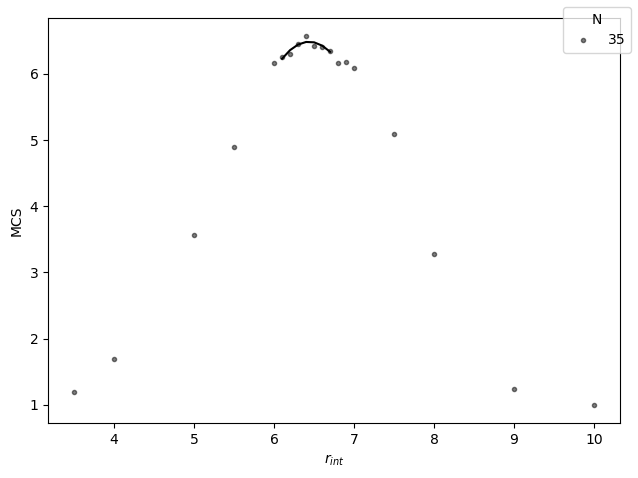

In [46]:
fig, ax = plt.subplots()
colors = plt.cm.gnuplot(np.linspace(0,1,len(Ns)))
ax.set(xlabel=r'$r_{int}$', ylabel='MCS')
for N,color in zip(Ns, colors):
    irs = availableIrs(N, arena_r, exclusion_r, push)
    dfmcs = getMeanClusterSize_ir(N, arena_r, exclusion_r, irs, push)
    ax.plot(dfmcs['interac_r'], dfmcs['mcs'], label=f'{N}', marker='.', lw=0.8, color=color, alpha=0.5, ls='None')
    maxMCS = max(dfmcs['mcs'])
    i = dfmcs[dfmcs.mcs == maxMCS].index[0]
    irs_spline, mcs_spline = np.array(dfmcs.iloc[i-3:i+3+1].interac_r), np.array(dfmcs.iloc[i-3:i+3+1].mcs)
    print(irs_spline)
    #tck_s = splrep(irs_spline, mcs_spline, s=len(mcs_spline))
    tck_s = splrep(irs_spline, mcs_spline, s=1)
    print(tck_s)
    ax.plot(irs_spline, BSpline(*tck_s)(irs_spline), '-', color=color)
    print(BSpline(*tck_s)(irs_spline))
fig.legend(title='N')
fig.tight_layout()

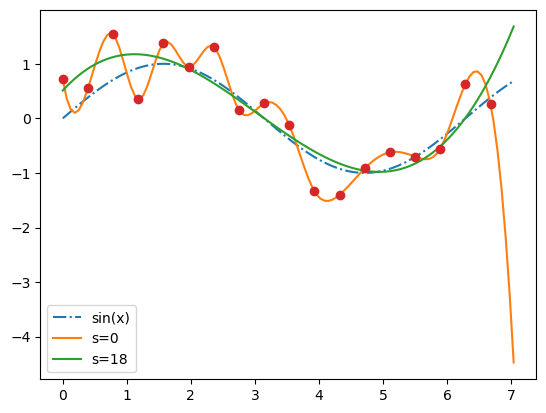

In [47]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/16)
rng = np.random.default_rng()
y =  np.sin(x) + 0.4*rng.standard_normal(size=len(x))

tck = splrep(x, y, s=0)
tck_s = splrep(x, y, s=len(x))
xnew = np.arange(0, 9/4, 1/50) * np.pi
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)')
plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')
plt.plot(x, y, 'o')
plt.legend()
plt.show()

In [57]:
from scipy.interpolate import make_interp_spline
bspl = make_interp_spline(x, y, k=3)

In [59]:
len(bspl.t)

22

In [54]:
tck

(array([0.        , 0.        , 0.        , 0.        , 0.78539816,
        1.17809725, 1.57079633, 1.96349541, 2.35619449, 2.74889357,
        3.14159265, 3.53429174, 3.92699082, 4.3196899 , 4.71238898,
        5.10508806, 5.49778714, 5.89048623, 6.67588439, 6.67588439,
        6.67588439, 6.67588439]),
 array([ 0.71349575, -1.14754585,  3.36125407, -0.60057402,  2.11558258,
         0.39550547,  1.96717225, -0.38382467,  0.48028739,  0.11188747,
        -1.66452621, -1.46418426, -0.87608976, -0.53929584, -0.69389007,
        -0.94603121,  1.80401068,  0.25908214,  0.        ,  0.        ,
         0.        ,  0.        ]),
 3)

In [55]:
x

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265, 3.53429174,
       3.92699082, 4.3196899 , 4.71238898, 5.10508806, 5.49778714,
       5.89048623, 6.28318531, 6.67588439])